# **SQL Books**

### **Objetivos:**
- Identificar tendencias en la publicación de libros después del 2000.
- Analizar el comportamiento de los usuarios respecto a calificaciones y reseñas.
- Determinar las editoriales y autores con mejor desempeño en términos de publicaciones y calificaciones.
- Explorar el comportamiento de los usuarios más activos en la plataforma.

### Explorar los datos
- Mostrar las primeras filas de cada tabla para entender la estructura.
Este es el diagrama de los datos:

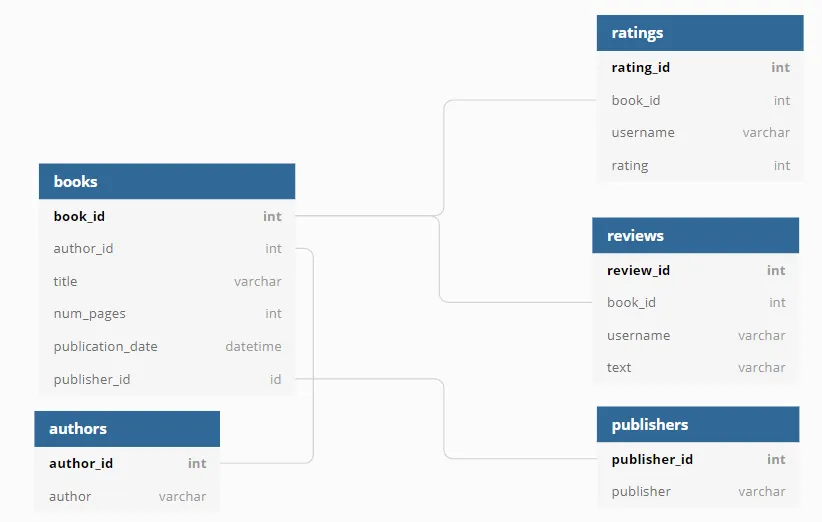

### Construir consultas SQL para cada tarea:

- Número de libros publicados después del 1 de enero de 2000
- Número de reseñas y calificación promedio por libro
- Editorial con más libros de más de 50 páginas
- Autor con la calificación promedio más alta (mínimo 50 calificaciones por libro)
- Promedio de reseñas de texto entre usuarios que calificaron más de 50 libros

### Interpretar los resultados:
- Explicar los hallazgos clave y su impacto en la propuesta de valor.


In [4]:
# Importar librerías
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Configuración de la base de datos
db_config = {
    'user': 'practicum_student',
    'pwd': 's65BlTKV3faNIGhmvJVzOqhs',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-analyst-final-project-db'
}

# Crear cadena de conexión
connection_string = f"postgresql://{db_config['user']}:{db_config['pwd']}@{db_config['host']}:{db_config['port']}/{db_config['db']}"

# Crear motor de conexión
engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

### Explorar los datos

In [7]:
query = "SELECT * FROM books LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268  


In [8]:
query = "SELECT * FROM ratings LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2


In [9]:
query = "SELECT * FROM reviews LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...  


In [10]:
query = "SELECT * FROM publishers LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company


In [11]:
query = "SELECT * FROM authors LIMIT 5;"
df = pd.read_sql(query, engine)
print(df)

   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd


***Información de las tablas:***

- *books*: Contiene información sobre los libros.
    - book_id (identificador único del libro).
    - author_id (autor del libro, relacionado con authors).
    - title (título del libro).
    - num_pages (número de páginas).
    - publication_date (fecha de publicación).
    - publisher_id (editorial, relacionada con publishers).

- *authors*: Contiene información sobre los autores de los libros.
    - author_id (identificador único del autor, relacionado con books).
    - author (nombre del autor).

- *publishers:* Contiene información sobre las editoriales.
    - publisher_id (identificador único de la editorial, relacionado con books).
    - publisher (nombre de la editorial).

- *ratings*: Contiene información sobre las calificaciones de los libros.
    - rating_id (identificador único de la calificación).
    - book_id (identificador del libro, relacionado con books).
    - username (usuario que dio la calificación).
    - rating (puntuación otorgada al libro).

- *reviews*: Contiene información sobre las reseñas de los libros.
    - review_id (identificador único de la reseña).
    - book_id (identificador del libro, relacionado con books).
    - username (usuario que escribió la reseña).
    - text (contenido de la reseña).

Estas tablas están relacionadas a través de book_id, author_id y publisher_id, lo que permite obtener información de ellas.

### Libros publicados después del 1 de enero de 2000

In [ ]:
# Verificar el total de libros 
query = """
SELECT COUNT(*) AS total_libros FROM books;
"""

df_total = pd.read_sql(query, engine)
print(df_total)

   total_libros
0          1000


In [12]:
# Contar los libros publicados después del 1 de enero de 2000
query = """
SELECT COUNT(*) AS Libros_publicados_después_del_1_de_enero_de_2000
FROM books
WHERE publication_date > '2000-01-01';
"""
# Ejecutar la consulta y obtener los resultados
df_result = pd.read_sql(query, engine)

# Mostrar el resultado
print(df_result)

   libros_publicados_después_del_1_de_enero_de_2000
0                                               819


In [ ]:
# Verificar de que año a que año hay publicación de libros 
query = """
SELECT 
    MIN(EXTRACT(YEAR FROM publication_date)) AS primer_anio,
    MAX(EXTRACT(YEAR FROM publication_date)) AS ultimo_anio
FROM books;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

   primer_anio  ultimo_anio
0       1952.0       2020.0


El primer año de publicación registrado es 1952 y el último año registrado es 2020.
Esto representa un rango de 69 años de publicaciones.
Se registran 819 libros publicados desde el 2000 hasta el año 2020, esto representa un aumento muy considerable en la producción reciente, ya que si asumimos el total de libros (1000), este periodo representa el 81%, es decir, una tendencia creciente, entonces más del 80% se han publicado en el siglo XXI, lo cual es un dato muy relevante.

### Número de reseñas y calificación promedio por libro

In [13]:
# Contar reseñas y obtener promedio de calificación por libro
query = """
SELECT 
    b.book_id,
    b.title,
    COUNT(DISTINCT r.review_id) AS numero_de_resenas,
    ROUND(AVG(rt.rating), 2) AS calificacion_promedio
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY b.title;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

     book_id                                              title  \
0          1                                       'Salem's Lot   
1          2                 1 000 Places to See Before You Die   
2          3  13 Little Blue Envelopes (Little Blue Envelope...   
3          4  1491: New Revelations of the Americas Before C...   
4          5                                               1776   
..       ...                                                ...   
995      996           Wyrd Sisters (Discworld  #6; Witches #2)   
996      997                        Xenocide (Ender's Saga  #3)   
997      998                                    Year of Wonders   
998      999                        You Suck (A Love Story  #2)   
999     1000  Zen and the Art of Motorcycle Maintenance: An ...   

     numero_de_resenas  calificacion_promedio  
0                    2                   3.67  
1                    1                   2.50  
2                    3                   4.67  
3  

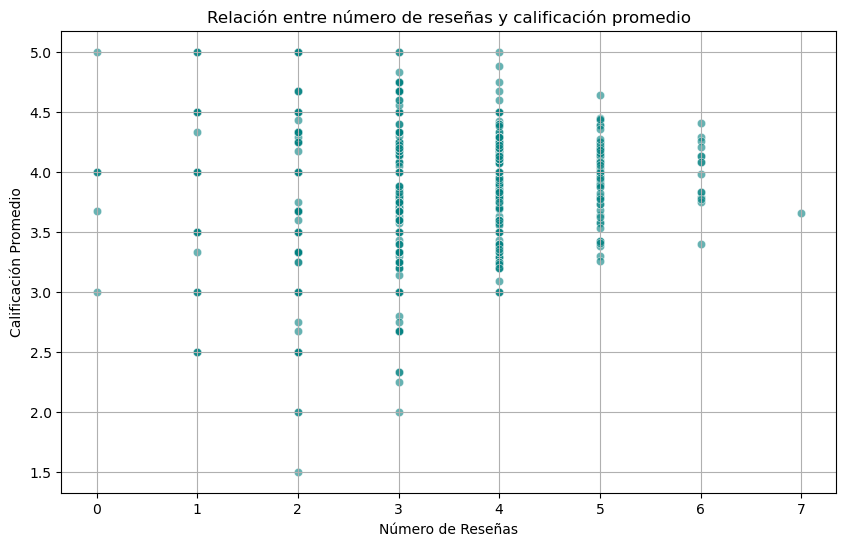

In [14]:
# Gráficar reseñas y calificación promedio por libro

plt.figure(figsize=(10, 6))

# Crear gráfico
sns.scatterplot(
    data=df_result, 
    x='numero_de_resenas', 
    y='calificacion_promedio', 
    alpha=0.6,
    color='teal'
)

plt.title('Relación entre número de reseñas y calificación promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

Cada columna representa un número de reseñas específico, y la dispersión vertical indica cómo varían las calificaciones para ese número de reseñas.

- La mayoría de los libros tienen entre 2 y 5 reseñas.
- Hay algunos libros con 0 o 1 reseña, lo que podría indicar que no son tan populares o son nuevos.
- Muchos libros se agrupan en una calificació entre 3.5 y 4.5, lo cual sugiere una tendencia general hacia calificaciones positivas.
- Algunos libros con solo 1 o 2 reseñas tienen calificaciones muy altas (5.0) o muy bajas (1.5), lo que podría ser sesgo por pocos datos.
- Muy pocos libros tienen más de 6 reseñas. Uno de ellos tiene una calificación promedio baja (3.3), lo cual es interesante y puede ser un caso para analizar más a fondo.

### Editorial con más libros de más de 50 páginas

In [15]:
query = """
SELECT 
    p.publisher AS editorial,
    COUNT(b.book_id) AS cantidad_de_libros
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY cantidad_de_libros DESC
LIMIT 1;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

       editorial  cantidad_de_libros
0  Penguin Books                  42


La editorial **Penguin Books** destaca como la que más libros ha publicado en la base de datos, con un total de 42 títulos. Esto sugiere una fuerte presencia de esta editorial en el catálogo, lo cual podría estar asociado a su prestigio, variedad de autores o popularidad entre los lectores.

### Autor con la calificación promedio más alta (mínimo 50 calificaciones por libro)

In [30]:
query = """
SELECT 
    a.author AS autor,
    AVG(sub.avg_rating) AS calificacion_promedio_autor,
    SUM(sub.cantidad_calificaciones) AS total_calificaciones_autor
FROM (
    SELECT 
        b.book_id,
        b.author_id,
        AVG(r.rating) AS avg_rating,
        COUNT(r.rating_id) AS cantidad_calificaciones
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(r.rating_id) >= 50
) AS sub
JOIN authors a ON sub.author_id = a.author_id
GROUP BY a.author
ORDER BY calificacion_promedio_autor DESC
LIMIT 1;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

                        autor  calificacion_promedio_autor  \
0  J.K. Rowling/Mary GrandPré                     4.283844   

   total_calificaciones_autor  
0                       310.0  


El autor J.K. Rowling/Mary GrandPré tiene la calificación promedio más alta, con un 4.28 sobre 5. Este promedio fue calculado considerando únicamente los libros que recibieron al menos 50 calificaciones cada uno, lo cual asegura una base sólida de evaluación.

En total, los libros de este autor suman 310 calificaciones, lo que respalda la consistencia y calidad percibida de su obra entre los lectores.

Esto refuerza la popularidad y aceptación de sus libros, especialmente si consideramos que este tipo de filtro (mínimo de 50 calificaciones) descarta obras con pocas opiniones, enfocándose solo en aquellas con un impacto real en la audiencia.

### Promedio de reseñas de texto entre usuarios que calificaron más de 50 libros

In [22]:
query = """
SELECT 
    AVG(review_count) AS promedio_reseñas
FROM (
    SELECT 
        rv.username,
        COUNT(rv.review_id) AS review_count
    FROM reviews rv
    WHERE rv.text IS NOT NULL AND TRIM(rv.text) != ''
      AND rv.username IN (
          SELECT username
          FROM ratings
          GROUP BY username
          HAVING COUNT(rating_id) > 50
      )
    GROUP BY rv.username
) AS user_reviews;
"""

df_result = pd.read_sql(query, engine)
print(df_result)

   promedio_reseñas
0         24.333333


Los usuarios que han calificado más de 50 libros escribieron en promedio 24.33 reseñas de texto. Este valor sugiere que además de ser usuarios activos en cuanto a calificaciones, también muestran compromiso al dejar comentarios escritos.

Este comportamiento puede ser muy valioso para plataformas que buscan fomentar contenido generado por usuarios, ya que estas reseñas suelen influir en las decisiones de otros lectores.

### Conclusión general de las consultas:

Este conjunto de consultas permitió explorar no solo la calidad y cantidad de obras en la base de datos, sino también el comportamiento de los lectores más activos. Los resultados destacan el valor de contar con datos limpios y bien estructurados para obtener información útil que puede apoyar decisiones editoriales, al final de cada consulta se encuentra una pequeña descripción.